<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/The%20Models/Subject_based_RNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/content/drive/My Drive/EEG_BCI/')
import datafetch
import plotters
import random

In [0]:
import random
from sklearn.model_selection import train_test_split

In [106]:
subj_1 = datafetch.fetch_subject(12)
subj_1.keys()

dict_keys(['test_data', 'train_data_class1', 'train_data_class2', 'train_data_class3', 'train_data_class4'])

In [0]:
def selector_desing(subject):
  selector = []
  for i in subject:
    for j in range(1,5):
      for k in range(18):
        selector.append((i,j,k))

  selector = np.array(selector)
  np.random.shuffle(selector)

  return selector

In [0]:
def selector_desing_test_data(subject):
  selector = []
  for i in subject:
    for j in range(1,5):
      for k in range(18,25):
        selector.append((i,j,k))

  selector = np.array(selector)
  np.random.shuffle(selector)
  return selector

In [109]:
selector = selector_desing([1])
selector.shape

(72, 3)

In [0]:
global indexes
global test_data_indexes
global selector
global selector_test_data
selector_test_data = selector_desing_test_data([1])
selector = selector_desing([1])
indexes = [i for i in range(18)]
test_data_indexes = [i for i in range(18,25)]

In [0]:
def data_loader(select):
  
  global indexes

  this_trail = select[2]
  index = select[2]
  
  Indexes = indexes.copy()
  Indexes.pop(index)  # so, now Indexes is the array [0,1,2,...,17] with out the this_trial index

  samples = random.sample(Indexes, 11)
  samples += [this_trail]


  data =  np.mean(subj_1['train_data_class{}'.format(select[1])][samples], axis=0)
  label = select[1]
  return data, label

In [0]:
def data_loader_test_data(select):
  
  global test_data_indexes

  this_trail = select[2]
  index = select[2]-18
  
  Indexes = test_data_indexes.copy()

  Indexes.pop(index)  # so, now Indexes is the array [18,19,...,24] with out the this_trial index


  samples = random.sample(Indexes, 3)
  samples += [this_trail]


  data =  np.mean(subj_1['train_data_class{}'.format(select[1])][samples], axis=0)
  label = select[1]
  return data, label

In [0]:
from plotters import EEG_plotter

In [0]:
EEG_plotter(40,data)
#The meaned data

In [0]:
EEG_plotter(40,subj_1['train_data_class{}'.format(select[1])][select[2]] )

# The Unmeaned data

In [0]:
def batch_loader(batch=[0,100]):
  # the batch=[a,b] can be 0...18000*4
  
  Label = []
  Data = []
  global selector
  

  for i in range(batch[0], batch[1]):
    data, label = data_loader(selector[int(i%len(selector))])
    Data.append(data)
    Label.append(label)

  Data = np.array(Data)
  Label = np.array(Label)

  return Data, Label

In [137]:
def batch_loader_test_data(batch=[0,100]):
  # the batch=[a,b] can be 0...35*4
  
  Label = []
  Data = []
  global selector_test_data
  global selector
  

  for i in range(batch[0], batch[1]):
    data, label = data_loader_test_data(selector_test_data[int(i%len(selector_test_data))])

    L = len(selector[selector[:,1]==label])
    data_for_mean = []
    for j in range(6):
      data_, label_ = data_loader(selector[selector[:,1]==label][int((i+j)%L)])
      data_for_mean.append(data_)
      data = np.mean(data_for_mean, axis=0)

    Data.append(data)
    Label.append(label)

  Data = np.array(Data)
  Label = np.array(Label)

  return Data, Label

ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [0]:
data, label  = batch_loader()

In [121]:
data.shape, label.shape

((100, 7200, 63), (100,))

# The Model

In [0]:
from tensorflow import keras

In [0]:
model = keras.models.Sequential()

#model.add(keras.layers.MaxPool1D(2, input_shape=[None, 63]))
model.add(keras.layers.Conv1D( 3, 100, strides=50, input_shape=[None, 63], activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(30, return_sequences=True, input_shape =[None, 63]))
model.add(keras.layers.GRU(1))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(4, activation ='softmax'))

# This got %34 accuracy

In [0]:
model = keras.models.Sequential()

#model.add(keras.layers.MaxPool1D(2, input_shape=[None, 63]))
#model.add(keras.layers.Conv1D( 3, 100, strides=50, input_shape=[None, 63], activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(30, return_sequences=True, input_shape =[None, 63]))
model.add(keras.layers.GRU(20))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(4, activation ='softmax'))

# This got %28  accuracy

In [0]:
model = keras.models.Sequential()

#model.add(keras.layers.MaxPool1D(2, input_shape=[None, 63]))
#model.add(keras.layers.Conv1D( 3, 100, strides=50, input_shape=[None, 63], activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.GRU(30, return_sequences=True, input_shape =[None, 63]))
model.add(keras.layers.GRU(20))
model.add(keras.layers.Dense(10, activation = 'relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(4, activation ='softmax'))

### It Got 100% accuracy with pusing method

In [125]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, None, 30)          8550      
_________________________________________________________________
gru_5 (GRU)                  (None, 20)                3120      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 28        
Total params: 11,974
Trainable params: 11,974
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics= ['accuracy'])

In [127]:
over_sample = 1
intervals = [[1000*i,1000*(i+1)] for i in range(10)]
for epoch in range(1):
  for interval in intervals:
    data, label = batch_loader(interval)
    data_test, label_test=  batch_loader_test_data()
    model.fit(data[:,::over_sample,:], label-1, epochs=2, validation_data=(data_test[:,::over_sample,:], label_test-1))
    print('')
    print('############################')
    print('############################')
    print('interval:{}    and    epoch:{}'.format(interval, epoch))
    print('############################')
    print('############################')
    print('')

Epoch 1/2
32/32 [==============================] - 17s 533ms/step - loss: 1.1128 - accuracy: 0.5870 - val_loss: 0.9793 - val_accuracy: 0.5200
Epoch 2/2
32/32 [==============================] - 16s 514ms/step - loss: 0.6975 - accuracy: 0.7180 - val_loss: 0.6662 - val_accuracy: 0.6900

############################
############################
interval:[0, 1000]    and    epoch:0
############################
############################

Epoch 1/2
32/32 [==============================] - 16s 515ms/step - loss: 0.4112 - accuracy: 0.8900 - val_loss: 0.4197 - val_accuracy: 0.8700
Epoch 2/2
32/32 [==============================] - 16s 513ms/step - loss: 0.1666 - accuracy: 1.0000 - val_loss: 0.2547 - val_accuracy: 0.9100

############################
############################
interval:[1000, 2000]    and    epoch:0
############################
############################

Epoch 1/2
32/32 [==============================] - 16s 516ms/step - loss: 0.0673 - accuracy: 1.0000 - val_loss: 0.2182 

In [0]:
data_test, label_test=  batch_loader_test_data()

In [139]:
model.evaluate(data_test, label_test-1)
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis=1) +1

4/4 [==============================] - 1s 151ms/step - loss: 0.0015 - accuracy: 1.0000


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
mat = confusion_matrix(label_test, y_pred)

array([[23,  0,  0,  0],
       [ 0, 27,  0,  0],
       [ 0,  0, 26,  0],
       [ 0,  0,  0, 24]])

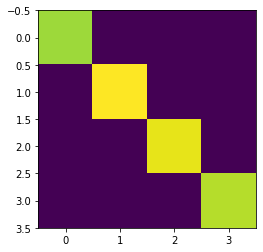

In [144]:
plt.imshow(mat)
mat


In [0]:
from sklearn.metrics import classification_report

In [143]:
print(classification_report(label_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        24

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

